# First steps with COSIPY

This is the first tutorial to get you started with using COSIPY. COSIPY can be run in two ways: Either by running `COSIPY.py` from the command line

`
$ python COSIPY.py
`

This will read the model configuration from the files `constants.py` and `config.py`, run the model and save the results to a netcdf file on disk. In this case any customization to the run is done by changing the relevant variable(s) in the previously mentioned files. It is also possible to run COSIPY in an interactive session, or from your own scripts. This is what we are going to go through in these tutorials. In this notebook you'll learn how to:

* Setup a simulation for a single gridpoint
* Run the simulation and save the results
* Do simple visualisations of the results using matplotlib

First we have to import the python libraries we are going to use

In [1]:
# Have to change the cwd for the ipython session, otherwise COSIPY
# will look for things in the wrong places.
import os
import sys
# This is not really a good method, if cell is re run we end up in the
# wrong directory.
os.chdir('./../')
sys.path.append(os.getcwd())

In [2]:
# edu_utils has some quality of life functions
from cosipy.utils import edu_utils
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Have to tell matplotlib to plot inline
%matplotlib inline

# Create input/output files

First we have to create the input and output datasets for the simulation. This is handled by the `IOClass` of COSIPY, which is not only responsible for creating the [xarray](http://xarray.pydata.org/en/stable/index.html) datasets holding the input and output data, but also for updating these datasets with new data after a run and saving the output to a netcdf file.

Before we initialize the `IO`, it is good to take a look at the variables and constants used by the `IO` module, and also the rest of the model. We can plot the defaults of the most interesting ones using the `print_options` from the `edu_utils`.

In [4]:
edu_utils.print_options()

,value
albedo_firn,0.55
albedo_fresh_snow,0.85
albedo_ice,0.3
albedo_method,Oerlemans98
densification_method,Boone
penetrating_method,Bintanja95
roughness_firn,4
roughness_fresh_snow,0.24
roughness_ice,1.7
roughness_method,Moelg12


These are loaded from the files `config.py` and `constants.py` located in the root directory of cosipy. We can change any of these variables to customize our simulation. This can by done changing the value of a variable in the previously mentioned files, however for this to take affect we have to reload the `edu_utils` module.  

A much simpler way is to store the variable we want to change in in the `opt_dict`. This is a dictionary which is passed along to the different modules of the model and overwrites the default variable. We can specify new values for any number of variables available in the list above. For instance we can change the variable `time_end` to adjust the temporal extent of our simulation:

In [5]:
# Inititalize an empty dictionary.
opt_dict = dict()
# Create a key-value pair for time end.
opt_dict['time_end'] = '2009-01-08T00:00'

We are now ready to initialize the `IOClass` and the datasets holding the input and output data for our simulation. For this we have a utility function `create_IO`, which takes the `opt_dict` and returns an instance of the `IOClass` and the `DATA` and `RESULTS` datasets.

In [6]:
IO, DATA, RESULTS = edu_utils.create_IO(opt_dict)


 Maximum available time interval from 2009-01-01T00:00 until 2009-01-31T23:00. Time steps: 744 


--------------------------------------------------------------
	 Integration from 2009-01-01T06:00 to 2009-01-08T00:00
--------------------------------------------------------------

--------------------------------------------------------------
Checking input data .... 

Temperature data (T2) ... ok 
Please check the input data, its seems they are out of range T2 MAX: 261.54 MIN: 238.74 

Relative humidity data (RH2) ... ok 
Shortwave data (G) ... ok 
Wind velocity data (U2) ... ok 
Precipitation data (RRR) ... ok 
Cloud cover data (N) ... ok 
Pressure data (PRES) ... ok 
Snowfall data (SNOWFALL) ... ok 

 Glacier gridpoints: 1 




Output dataset ... ok


The output above gives us some helpful insight about the data. We can see that the data covers the period 2009-01-01 to 2009-01-31, and that we have specified the integration time to 2009-01-01 to 2009-01-08 by adding a new value to `time_end` in the `opt_dict`. We also see that we have one gridpoint which we will perform the calculations on.

It also shows some quality control on the input data, more on this later.

<div class="alert alert-success">
    <b>Note</b> that we don't have to use the <b>opt_dict</b> as we did above - if we don't, the simulation will run using the default parameters from config.py and constants.py.

Also note that the IOClass along with the DATA and RESULTS datasets has to be <b>re-initliazed</b> after a variable has been changed/added to the <b>opt_dict</b>.
</div>

# Running COSIPY
Now we are ready to do a simple point simulation with COSIPY. This example is run on the Zhadang glacier. We can change this by changing the `input_netcdf` via the `opt_dict` to point at the files we want to use. In these tutorials data for Zhadang and Hintereisferner are included.


We can then run the model by simply calling the `run_model` function from the `edu_utils`

<div class="alert alert-success">
    <b>Note that this can take some time.</b>
</div>

In [9]:
edu_utils.run_model(DATA, IO, RESULTS, opt_dict)

Model is running, check progress here: Progress is currently diabled
Finished!


Thats it! Now we are ready to inspect the results.

# Visualizing the results
To get a quick overview of the variables in our dataframe, we can simply call it 

In [10]:
RESULTS

<xarray.Dataset>
Dimensions:       (lat: 1, lon: 1, time: 163)
Coordinates:
  * time          (time) datetime64[ns] 2009-01-01T06:00:00 ... 2009-01-08
  * lat           (lat) float64 30.47
  * lon           (lon) float64 90.64
Data variables:
    HGT           (lat, lon) float64 5.665e+03
    MASK          (lat, lon) int64 1
    SLOPE         (lat, lon) int64 0
    ASPECT        (lat, lon) int64 0
    T2            (time, lat, lon) float64 252.6 252.3 252.8 ... 246.7 246.2
    RH2           (time, lat, lon) float64 74.78 73.52 70.42 ... 97.62 93.54
    U2            (time, lat, lon) float64 1.506 1.414 1.462 ... 1.636 1.775
    PRES          (time, lat, lon) float64 499.9 500.2 500.7 ... 502.6 502.4
    G             (time, lat, lon) float64 0.0 0.03556 65.49 ... 0.0 0.0 0.0
    RRR           (time, lat, lon) float64 0.1402 0.0968 0.0329 ... 0.0 0.0 0.0
    SNOWFALL      (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    N             (time, lat, lon) float64 0.951 0.8246 ... 0.07489 0.006226
    RAIN          (time, lat, lon) float64 0.1122 0.07745 0.0 ... 0.0 0.0 0.0
    LWin          (time, lat, lon) float64 218.8 197.7 158.9 ... 123.7 121.5
    LWout         (time, lat, lon) float64 -225.4 -218.8 ... -185.5 -182.4
    H             (time, lat, lon) float64 0.9171 0.9077 0.0 ... 0.0 0.0 0.04977
    LE            (time, lat, lon) float64 -0.7164 -0.08015 0.0 ... 0.0 0.007008
    B             (time, lat, lon) float64 6.293 20.02 40.0 ... 58.91 61.8 60.81
    QRR           (time, lat, lon) float64 0.118 0.2205 0.0 0.0 ... 0.0 0.0 0.0
    surfMB        (time, lat, lon) float64 -9.135e-07 -1.02e-07 ... 8.902e-09
    MB            (time, lat, lon) float64 0.0001113 7.735e-05 ... 8.902e-09
    Q             (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SNOWHEIGHT    (time, lat, lon) float64 0.2 0.2 0.2 ... 0.2033 0.2033 0.2033
    TOTALHEIGHT   (time, lat, lon) float64 40.2 40.2 40.2 ... 40.2 40.2 40.2
    TS            (time, lat, lon) float64 251.7 249.9 247.0 ... 239.8 238.8
    ALBEDO        (time, lat, lon) float64 0.8487 0.8482 ... 0.8239 0.8233
    LAYERS        (time, lat, lon) float64 41.0 39.0 38.0 ... 37.0 37.0 37.0
    ME            (time, lat, lon) float64 0.0003155 1.904e-05 ... 0.0003386 0.0
    intMB         (time, lat, lon) float64 0.0001122 7.745e-05 ... 3.65e-09 0.0
    EVAPORATION   (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SUBLIMATION   (time, lat, lon) float64 -9.101e-07 -1.018e-07 0.0 ... 0.0 0.0
    CONDENSATION  (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    DEPOSITION    (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 8.902e-09
    REFREEZE      (time, lat, lon) float64 0.0001122 7.745e-05 ... 3.65e-09 0.0
    subM          (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Z0            (time, lat, lon) float64 0.0002426 0.0002452 ... 0.0003648
    surfM         (time, lat, lon) float64 3.401e-09 2.052e-10 ... 3.65e-09 0.0
Attributes:
    Start_from_restart_file:                    False
    Stake_evaluation:                           False
    WRF_simulation:                             False
    Compression_level:                          2
    Slurm_use:                                  False
    Full_fiels:                                 False
    Force_use_TP:                               False
    Force_use_N:                                False
    Tile_of_glacier_of_interest:                False
    Time_step_input_file_seconds:               3600
    Max_layers:                                 200
    Z_measurment_height:                        2.0
    Stability_correction:                       Ri
    Albedo_method:                              Oerlemans98
    Densification_method:                       Boone
    Penetrating_method:                         Bintanja95
    Roughness_method:                           Moelg12
    Saturation_water_vapour_method:             Sonntag90
    Initial_snowhei

We can see that our data is stored in an xarray dataset - a very handy format for interacting with netcdf files in python. To check which data variables are available, one can simply click on the label "Data Variables", which will expand a list of the variables.

We can quckly plot a variable, the surface mass balance (`surfMB`) for instance:

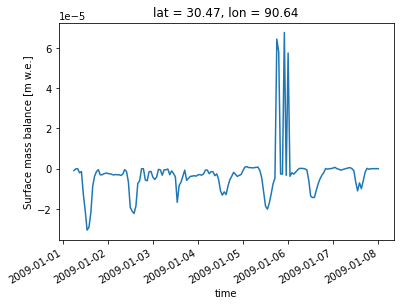

In [11]:
RESULTS.surfMB.plot();

As you can see, the use of xarray-datasets for storing the data makes it possible to levarage the built in plotting functionality of xarray and quickly visualize the output.

For a slightly more advanced plot, one can still make use of matplotlib

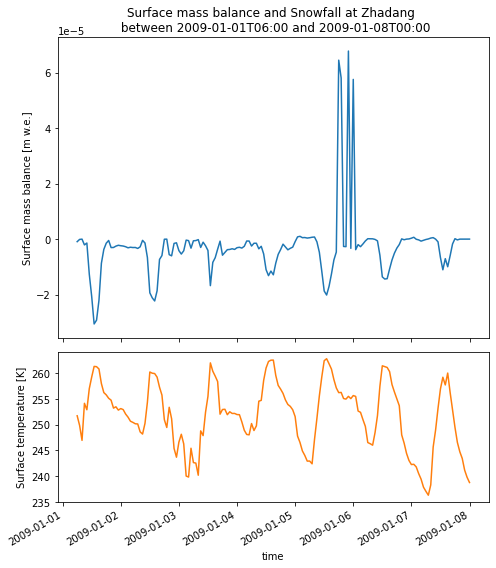

In [12]:
fig, (ax1, ax2) = plt.subplots(figsize=(7,8), nrows=2, sharex=True,
                               gridspec_kw = {'height_ratios':[2,1]})
RESULTS.surfMB.plot(ax=ax1)
RESULTS.TS.plot(ax=ax2, color='C1')
# Easier to make use of xarray plotting capabilites and then remove unwanted lables.
ax1.set_xlabel('')
ax2.set_title('')
# Get the time span of our dataset to use for title
time_span = RESULTS.time[0].values, RESULTS.time[-1].values
time_span = np.datetime_as_string(time_span, unit='m')
# Set the title of the plot.
ax1.set_title(f'Surface mass balance and Snowfall at Zhadang \n between {time_span[0]} and' +\
              f' {time_span[1]}')
# Fixes the spacing between parts of the plots.
fig.tight_layout()

**Notice the scale of the surface mass balance.** In the plot above, we see the surface mass blance (blue) and the 2-meter air temperature (orange). Even though the air temperautre stays below 0°C (273.15K) for the entire period, the mass balance is still negative during the day. We will investigate this is the following section.

<div class="alert alert-warning">
    <details>
    <Summary><b>Question: Can you think of a variable to plot as a way to explain the positive surface mass balance during the 6th of January?</b> <i>Click me for a hint</i></Summary>
        Try plotting the snowfall, i.e. RESULTS.SNOWFALL.plot().
    </details>
</div>

In [ ]:
# Write your code here


## A look at what is causing the melt

Since the temperature never reaches above zero, melt is not causing the small loss of mass during the days seen in the plot above. Instead it is sublimation, the process when a substance transitions from solid to gas without passing through the liquid state. We can plot the sublimation quickly to confirm this:

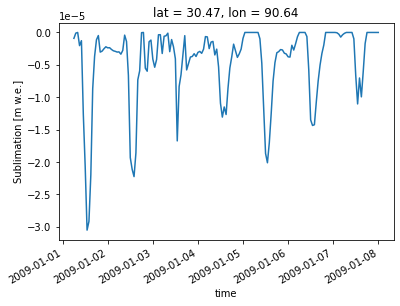

In [13]:
RESULTS.SUBLIMATION.plot();

## Next steps
[Back to overview](welcome.ipynb)

[Sensitivity studies with COSIPY](sensitivity_study.ipynb)